# Evaluating Eilenberg-Maclane coordinates on new points

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dreimac import CircleMapUtils, CircularCoords, GeometryExamples

We load a point cloud $X$ sampled from the unit circle in $\mathbb{R}^2$ with noise.

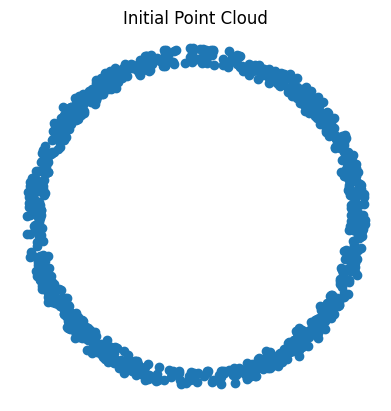

In [2]:
X = GeometryExamples.noisy_circle(1000,noise_size=0.1,seed=42)
plt.scatter(X[:,0],X[:,1])
plt.title("Initial Point Cloud")
plt.gca().set_aspect("equal"); _ = plt.axis("off")

Since the dataset exhibits a $1$-cohomology class, we can compute a sparse circular coordinate map

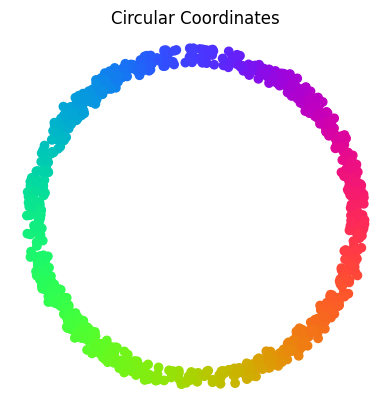

In [3]:
cc =CircularCoords(X,n_landmarks=100)
cc_theta = cc.get_coordinates()
plt.scatter(X[:,0],X[:,1],c =CircleMapUtils.to_sinebow(cc_theta))
plt.title("Circular Coordinates")
plt.gca().set_aspect("equal") ; _ = plt.axis("off")

The circular coordinate map is defined on an offset $L^{(\alpha)}$ of the landmarks. We can extract this $\alpha$ via the <tt>_r_cover</tt> parameter.

In [4]:
print(cc._r_cover)

0.47698162496089935


Now, we can evaluate the circular coordinates defined by point cloud $X$ on query points using the <tt>X_query</tt> argument.
DREiMac returns np.nan for points outside the coverage of landmarks, which correspond to black points in the following plot. 

/home/theniche/Research/DREiMac/dreimac/emcoords.py:222: UserWarning: There are 492 point not covered by a landmark
  warnings.warn("There are {} point not covered by a landmark".format(nzero))


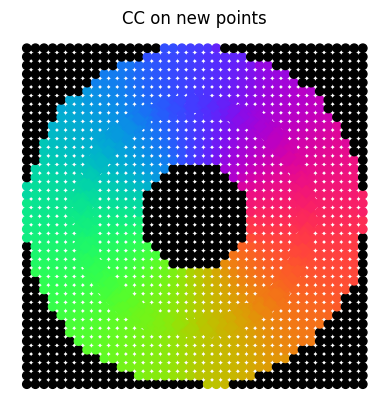

In [5]:
t = np.linspace(-1.5,1.5,num=40)
Y = np.asarray(np.meshgrid(t,t)).reshape((2,-1)).T
theta = cc.get_coordinates(X_query=Y)
plt.scatter(Y[:,0],Y[:,1],c=CircleMapUtils.to_sinebow(theta))
plt.scatter(X[:,0],X[:,1],c=CircleMapUtils.to_sinebow(cc_theta),marker='D')
plt.title("CC on new points")
plt.gca().set_aspect("equal") ; _ = plt.axis("off")

## Query via Distance Matrix

We can input a distance matrix distances from landmarks, even if the circular coordinates are intialized with a point cloud, using the <tt>distance_matrix_query</tt> flag. If <tt>distance_matrix_query</tt> is <tt>True</tt>, then <tt>X_query</tt> is treated as a distance matrix to the landmarks.

/home/theniche/Research/DREiMac/dreimac/emcoords.py:222: UserWarning: There are 492 point not covered by a landmark
  warnings.warn("There are {} point not covered by a landmark".format(nzero))


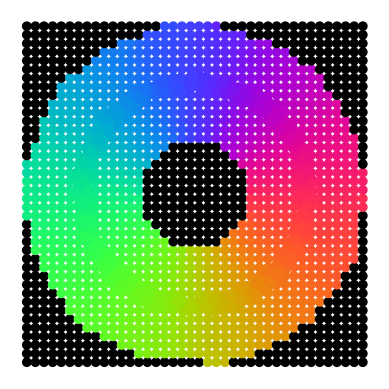

In [6]:
from scipy.spatial.distance import cdist
Y_query = cdist(X[cc._idx_land], Y)
theta = cc.get_coordinates(X_query=Y_query, distance_matrix_query=True)
plt.scatter(Y[:,0],Y[:,1],c=CircleMapUtils.to_sinebow(theta))
plt.scatter(X[:,0],X[:,1],c=CircleMapUtils.to_sinebow(cc_theta),marker='D')
plt.gca().set_aspect("equal") ; _ = plt.axis("off")


## Initializing Via Distance Matrices

We can run the complete circular coordinates pipeline via just distance matrices

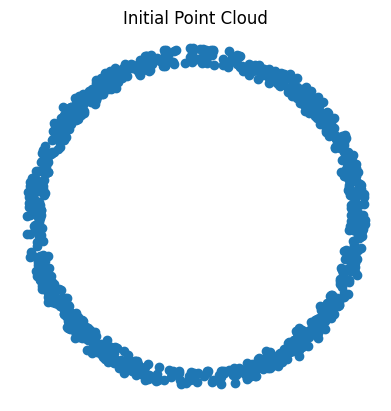

In [7]:
X = GeometryExamples.noisy_circle(1000,noise_size=0.1,seed=42)
plt.scatter(X[:,0],X[:,1])
plt.title("Initial Point Cloud")
plt.gca().set_aspect("equal"); _ = plt.axis("off")

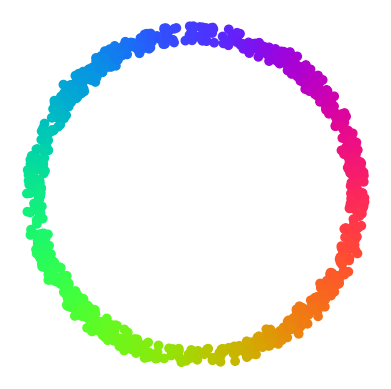

In [8]:
from scipy.spatial.distance import cdist
dist_mat = cdist(X,X) ## Compute distance matrix

## Use Dist. Mat. from initialization
cc = CircularCoords(X=dist_mat, distance_matrix=True, n_landmarks=100) 
cc_theta = cc.get_coordinates()

plt.scatter(X[:,0], X[:,1], c=CircleMapUtils.to_sinebow(cc_theta))
plt.gca().set_aspect("equal") ; _ = plt.axis("off")

Now, since the <tt>CircularCoords</tt> have access to the original point cloud, the only way to compute coordinates on query points is via distance matrices.

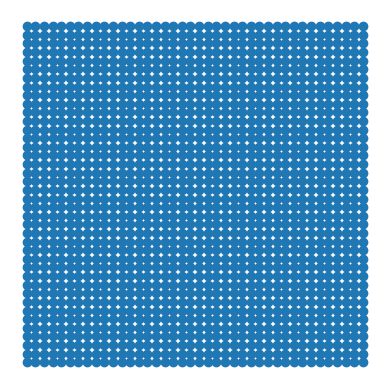

In [9]:
t = np.linspace(-1.5,1.5,num=40)

#start with a grid of new points
Y = np.asarray(np.meshgrid(t,t)).reshape((2,-1)).T 

#Compute the distance matrix for querying
Y_query = cdist(X[cc._idx_land],Y)

plt.scatter(Y[:,0],Y[:,1])
plt.gca().set_aspect("equal") ; _ = plt.axis("off")


/home/theniche/Research/DREiMac/dreimac/emcoords.py:222: UserWarning: There are 492 point not covered by a landmark
  warnings.warn("There are {} point not covered by a landmark".format(nzero))


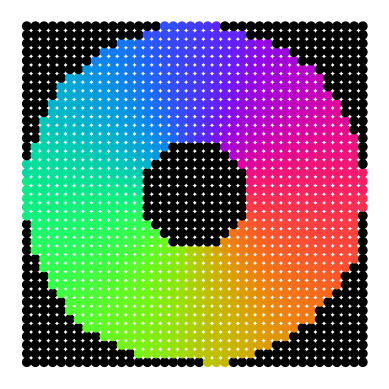

In [10]:
theta = cc.get_coordinates(X_query=Y_query, distance_matrix_query=True)

plt.scatter(Y[:,0],Y[:,1],c=CircleMapUtils.to_sinebow(theta))
plt.gca().set_aspect("equal") ; _ = plt.axis("off")

In the distance matrix case, trying to evaluate Eilenberg Maclane coordinates on new points directly raises an error.

In [11]:
out = cc.get_coordinates(X_query=Y,distance_matrix_query=False)

Exception: Coordinates initialized by distance matrix. Please input query as a distance matrix to landmarks.